###**Introdução**

Nessa fase, iremos alterar a base de dados em relação à base anterior. Estamos fazendo isso pois a base de dados usada na fase anterior possuía muitas colunas booleanas, e isso dificultava a classificação do algoritmo KMeans. Sendo assim, iremos utilizar uma nova base de dados com o mesmo tema, diagnóstico de diabetes. Essa nova base possui dados multivariados que dizem respeito apenas à mulheres acima de 19 anos. O objetivo dessa fase continua sendo o mesmo.


**Base de dados**

- Pregnancies - Número de gestações
  valores: int

- Glucose - Nível de glicose no sangue pós jejum (mg/Hl)
  valores: int

- BloodPressure - Pressão sanguínea
  valores: int
- SkinThickness - Espessura da dobra cutânea do tríceps (mm)
  valores: int
- Insulin - Nível de insulina no organismo
  valores: int
- BMI - índice de massa corporal
  valores: int
- DiabetesPedrigreeFunction - coeficiente de Pré-disposição gênética
  valores: int
- Age - Idade
  valores: int
- Outcome - Diagnóstico de diabetes
  valores(0 = não, 1 = sim)

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/diabetesKMeans.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### **Análise exploratória**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

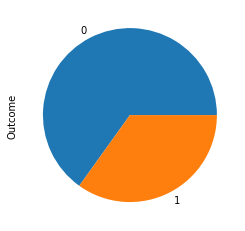

In [ ]:
df['Outcome'].value_counts().plot.pie()

Há uma distribuição de cerca de 2/3 da amostra com diagnóstico positivo de diabetes, enquanto 1/3 possui diagnóstico negativo.

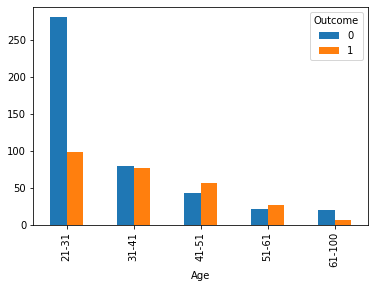

In [ ]:
Categorias = ['21-31','31-41','41-51','51-61','61-100']
Intervalos = [21,31,41,51,61,100]
faixas = pd.cut(df['Age'], bins = Intervalos, labels = Categorias)
df2 = pd.concat([df['Outcome'],faixas],axis=1 )
pd.crosstab([df2['Age']], df2['Outcome']).plot.bar()

Esse gráfico de barras revela que:
* Os diagnósticos positivos de diabetes em mulheres foram proporcionalmente maiores que os negativos na faixa dos 41-61 anos
* A maioria das amostras encontra-se entre os 21-31 anos

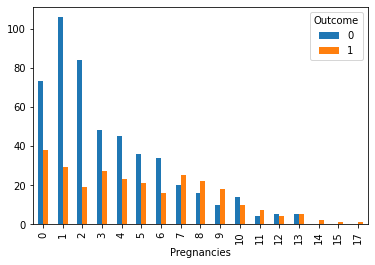

In [ ]:
pd.crosstab([df['Pregnancies']], df2['Outcome']).plot.bar()

Esse gráfico mostra que:
* Mulheres que já passaram por mais que 7 gestações podem estar mais propensas a terem um diagnóstico positivo pra diabetes. Isso pode ser por causa das alterações hormonais que acontecem no organismo.

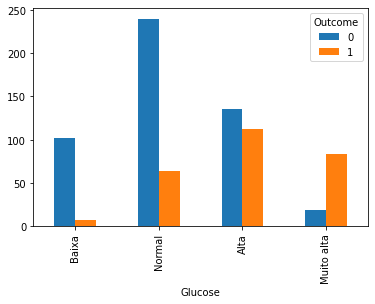

In [ ]:
Categorias = ['Baixa','Normal','Alta','Muito alta']
Intervalos = [50,90,120,160,200]
faixas = pd.cut(df['Glucose'], bins = Intervalos, labels = Categorias)
df2 = pd.concat([df['Outcome'],faixas],axis=1 )
pd.crosstab([df2['Glucose']], df2['Outcome']).plot.bar()

O nível de glicose no sangue é um dos principais fatores da presença de diabetes, como evidenciado no gráfico. Quanto maiores os níveis de glicose, maior a proporção de pacientes diabéticas em relação a não-diabéticas.

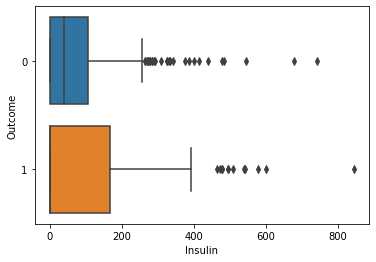

In [ ]:
sns.boxplot(data =df, x = 'Insulin', y = 'Outcome', orient = 'h')

As mulheres com um uso maior de insulina também possuem uma proporção maior de diagnósticos positivos em relação aquelas que consomem menos. Apesar da presença de muitos outliers na parte dos diagnósticos negativos, eles podem estar relacionados com outros problemas de saúde.

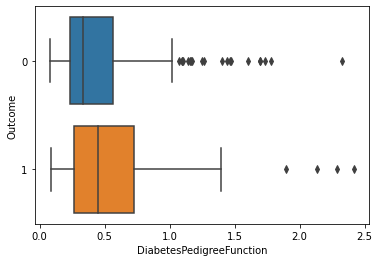

In [ ]:
sns.boxplot(data =df, x = 'DiabetesPedigreeFunction', y = 'Outcome', orient = 'h')

Vemos que o diagnóstico de diabetes tende a ser mais recorrente em mulheres que possuem um índice pedigree maior. Esse índice leva em conta os fatores genéticos da pessoa, sua árvore genealógica e antecedentes de diabetes na família.

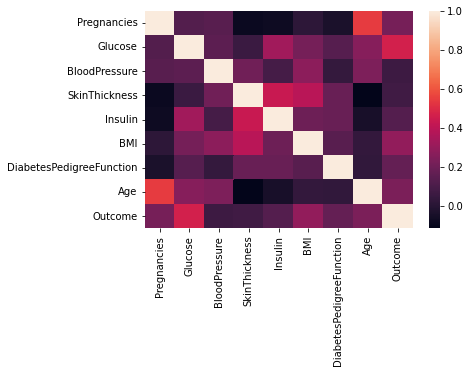

In [ ]:
sns.heatmap(df.corr())

As variáveis que possuem maior correlação com o diagnóstico positivo são o índice de massa corporal e o nível de glicose. Os fatores com menos correlação são a espessura da pele e a pressão sanguínea.

### **Modelo**

In [ ]:
from sklearn.cluster import KMeans
treino = df.drop('Outcome',axis=1)
kmeans=KMeans(n_clusters=2)
kmeans.fit(treino)
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,

Removida a coluna do diagnóstico, criados os clusters, vamos verificar o score:

In [ ]:
kmeans.score(treino)*-1**0.5

5142376.455984384

Como é um modelo não-supervisionado, essa medida não é muito importante por agora. Ela será útil apenas para compararmos os agrupamentos de treino e teste. Sendo assim, vamos analisar os gráficos e tentar encontrar fatores que podem ser importantes ou não para o diagnóstico positivo de diabetes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


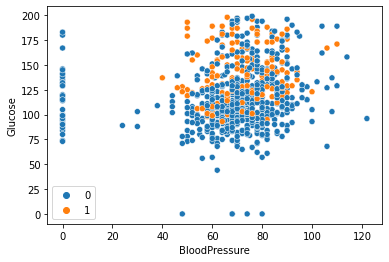

In [ ]:
import seaborn as sns
sns.scatterplot(treino['BloodPressure'],treino["Glucose"],hue=kmeans.labels_)

A pressão sanguínea não parece ser algo relevante para o diagnóstico positivo. Como visto na análise exploratória, a correlação entre esses dois fatores parece ser baixa. O gráfico só deixa isso mais claro. Por outro lado, o nível de glicose no sangue é sem dúvidas o fator mais importante, visto que praticamente todos os diagnósticos positivos provenientes do agrupamento estão com a concentração de glicose no sangue acima de 100  em jejum.
É possível notar que na maioria das amostras, a pressão sanguínea das pessoas se encontra entre 70 e 120 mm/HG, o que pode ser considerado normal entre mulheres de 19 a 34 anos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


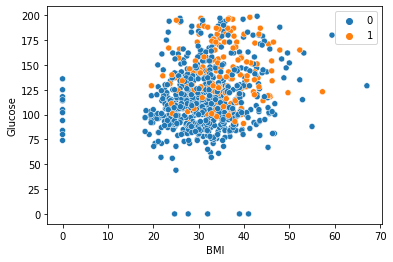

In [ ]:
sns.scatterplot(treino['BMI'],treino["Glucose"],hue=kmeans.labels_)

O índice de massa corporal pode ser considerado algo importante para o diagnóstico, devido que no gráfico é possível ver que os diagnósticos positivos estão mais concentrados nas mulheres com um índice de massa corporal maior do que 30 (Que indica obesidade para pessoas maiores de 19 anos).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


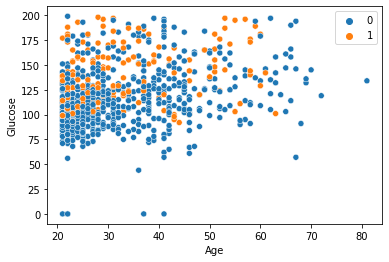

In [ ]:
sns.scatterplot(treino['Age'],treino["Glucose"],hue=kmeans.labels_)

A idade não parece ser muito importante para o diagnóstico positivo. No entanto, o nível de glicose no sangue mostra ser um fator de risco independente da idade.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


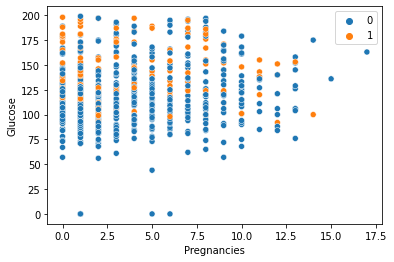

In [ ]:
sns.scatterplot(treino['Pregnancies'],treino["Glucose"],hue=kmeans.labels_)

Durante a análise exploratória, um dos gráficos tinha levado a entender que um número de gestações acima de 8 poderia indicar um potencial risco. No entanto, ao visualizar esse gráfico vemos que não é. O alto nível de glicose se mantém como o principal fator.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


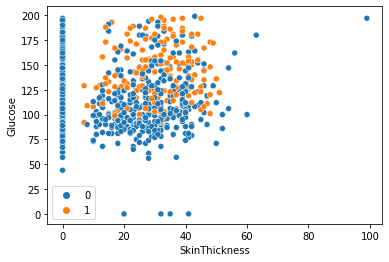

In [ ]:
sns.scatterplot(treino['SkinThickness'],treino["Glucose"],hue=kmeans.labels_)

Como é possível observar, há uma pequena correlação entre a espessura da dobra cutânea e o diagnóstico positivo. A espessura da dobra cutânea no tríceps é uma medida realizada para tentar estimar a gordura presente no corpo de uma pessoa. Quanto maior essa medida, mais a pessoa tende a possuir alguns problemas de saúde, como obesidade e até um desequilíbrio no metabolismo. Sendo assim, ela pode ser um indicador de diabetes, mas não cehga a ser muito influente. Como vemos no gráfico, os diagnósticos positivos de diabetes aumentam um pouco quando a medida da dobra cutânea também aumenta.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


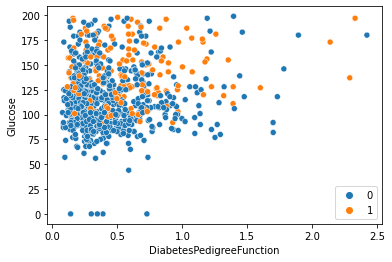

In [ ]:
sns.scatterplot(treino['DiabetesPedigreeFunction'],treino["Glucose"],hue=kmeans.labels_)

A função de predisposição genética à diabetes é um possível fator de risco, apesar de não ser tão influente, tem um certo grau de relevância. Essa função avalia o histórico de diabetes na família e a predisposição genética. Apesar de ser um fator a ser considerado, ele não tem um risco muito alto pois uma pessoa pode ter predisposição à diabetes mas se adotar um estilo de vida saudável ela não desenvolve a doença.

In [ ]:
teste = df
kmeans2=KMeans(n_clusters=2)
kmeans2.fit(teste)
kmeans2.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,

Usando agora a base de dados incluindo as features, para verificar se os agrupamentos continuam os mesmos.

In [ ]:
kmeans2.score(teste)*-1**0.5

5142544.699735325

A medida do score em teste é muito semelhante à de treino, ou seja, o modelo indicou agrupamentos bem parecidos, então pode ser considerado eficiente.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


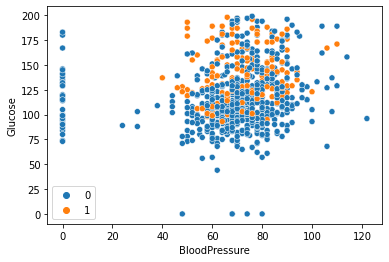

In [ ]:
sns.scatterplot(teste['BloodPressure'],teste["Glucose"],hue=kmeans2.labels_)

Aqui o nível de pressão sanguínea se mostrou muito semelhante ao que foi constatado na fase anterior. O nível de glicose ainda aparenta ser o principal fator de risco. Sendo assim, podemos concluir que o modelo manteve os agrupamentos bem semelhantes, o que é positivo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


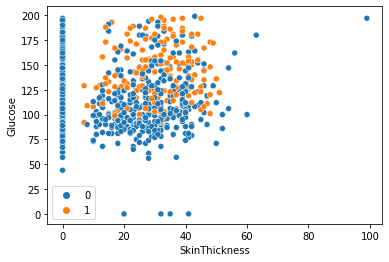

In [ ]:
sns.scatterplot(teste['SkinThickness'],teste["Glucose"],hue=kmeans2.labels_)

Mesma coisa na questão da espessura da dobra cutânea do tríceps. Uma correlação bem baixa, porém presente.

###**Conclusão**
Após realizar as programações à respeito dos agrupamentos, vimos que os principais fatores de risco apontado pelo modelo KMeans é o nível de glicose no sangue e o índice de massa corporal. Foi possível detectar também possíveis fatores de risco, como a espessura da dobra cutânea e a função de pré-disposição genética. Dessa maneira, é notável que o modelo conseguiu agrupar bem pacientes com propensão à diabetes, e poderia ser usado com um bom grau de confiança em um contexto clínico, apesar de ser um modelo de aprendizado não-supervisionado.